In order to be able to train and test the data to predict a player's fantasy points, let's first start by adding a column that reprisents the target variable, aka the following weeks total points for that player, given the current week's stats for that player.

In [2]:
import pandas as pd
import numpy as np

raw = pd.read_csv('top500histories.csv', index_col=0)

In [3]:
raw.columns

Index(['assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'element',
       'fixture', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'round', 'saves',
       'selected', 'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'gameweek', 'id_', 'sum_points', 'web_name',
       'next_week_points'],
      dtype='object')

In [4]:
raw_sorted = raw.sort_values('gameweek')

In [5]:
df = raw_sorted[['id_', 'web_name', 'gameweek', 'goals_scored', 'assists', 'clean_sheets', 'bps', 'saves', 'minutes', 'sum_points', 'next_week_points']]

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
m = ols('next_week_points ~ goals_scored + assists + clean_sheets + bps + saves + minutes + sum_points', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:       next_week_points   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     59.12
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           9.05e-75
Time:                        19:31:59   Log-Likelihood:                -3218.7
No. Observations:                1457   AIC:                             6453.
Df Residuals:                    1449   BIC:                             6496.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4890      0.081      6.030   

In [14]:
df['fitted'] = m.fittedvalues

C:\Users\Cooper\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


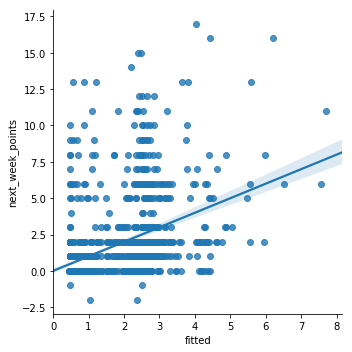

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='fitted', y='next_week_points', data=df)

plt.show()

In [20]:
fitted = df[df.gameweek == 2].sort_values('fitted', ascending=False)[['id_', 'fitted']]
fitted.head()

,id_,fitted
171,278,7.704726
18,192,4.876623
222,214,4.874876
3160,346,4.760647
1089,90,4.619796


In [21]:
fitted.to_csv('fitted', index=False)